In [2]:
#| echo: false
#| output: false
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Opis zestawu danych

In [3]:
#| echo: false
#| output: false
df = pd.read_csv("obesity_clear.csv")
df = df.head(485)
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II' , 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
df["BMI_classification"] = pd.Categorical(df["BMI_classification"], categories=custom_order, ordered=True)
df = df.drop(columns = "Unnamed: 0")
# Sortowanie według niestandardowej kolejności
df = df.sort_values("BMI_classification")
# Podgląd danych
df.head()

,Gender,Age,Height,Weight,overweight_in_family,high_cal_food,vegetables_consumption,number_of_main_meals,consumption_between_meals,is_smoking,daily_water_consumption,calories_monitoring,physical_activity,time_using_technology,alcohol_consumption,prefered_transportation,BMI,BMI_classification
331,Male,17.0,1.74,56.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,no,Public_Transportation,18.496499,Insufficient_Weight
75,Female,23.0,1.63,45.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,2.0,0.0,no,Public_Transportation,16.937032,Insufficient_Weight
356,Male,17.0,1.90,60.0,no,no,3.0,3.0,Sometimes,no,2.0,no,3.0,1.0,no,Walking,16.620499,Insufficient_Weight
421,Male,18.0,1.84,60.0,yes,yes,3.0,4.0,Sometimes,no,2.0,yes,2.0,0.0,Sometimes,Automobile,17.722117,Insufficient_Weight
140,Male,23.0,1.89,65.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,18.196579,Insufficient_Weight


Zestaw danych został skompletowany na podstawie 16 pytań w ankiecie przeprowadzonej na terytorium Meksyku, Peru i Kolumbii na grupie 485 osób.
Dla danych pochodzących z ankiet obliczono $$ BMI = \frac{Weight}{Height^2}, $$ a następnie skategoryzowane je w następujący sposób:

* Underweight: BMI Less than 18.5
* Normal: BMI 18.5 to 24.9
* Overweight I: BMI 25.0 to 26.9
* Overweight: BMI 27.0 to 29.9
* Obesity I: BMI 30.0 to 34.9
* Obesity II: BMI 35.0 to 39.9
* Obesity III: BMI Higher than 40

## Podstawowe statystyki
### Tabela z podstawowymi statystykami

Przebadano 485 respondentów. Średni wiek badanych osób to 23 lata. Osoby te wypijają średnio 2 litry wody dziennie, zawsze spożywają dziennie co najmniej jedno warzywo. Co czwarta osoba nie uprawia żadnej aktywności fiznycznej, a średnie BMI to 24.34. Średnia wartośc BMI dla próbki badanych mieści się w górnej granicy prawidłowego stosunku wagi do wzrostu.

In [3]:
#| echo: false
#| output: true
df.describe()

,Age,Height,Weight,vegetables_consumption,number_of_main_meals,daily_water_consumption,physical_activity,time_using_technology,BMI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,23.162887,1.685216,69.552165,2.325773,2.657732,1.927835,1.164948,0.661856,24.341385
std,6.718380,0.097454,17.041178,0.590083,0.923951,0.677980,1.023287,0.722347,4.787519
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.291588
25%,19.000000,1.610000,58.000000,2.000000,3.000000,1.000000,0.000000,0.000000,21.007668
50%,21.000000,1.680000,67.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.711845
75%,24.000000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000,26.672763
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,49.472390


## Przynależność do kategorii BMI

::: {.panel-tabset}
## Wykres

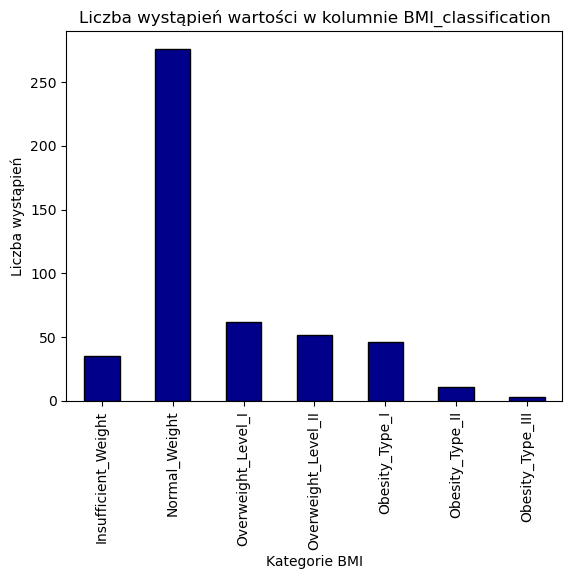

In [4]:
#| echo: false
#| output: true
# Zliczenie wystąpień
counts = df['BMI_classification'].value_counts().sort_index()

# Tworzenie barplotu
counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Liczba wystąpień wartości w kolumnie BMI_classification')
plt.xlabel('Kategorie BMI')
plt.ylabel('Liczba wystąpień')
plt.show()


## Tabela

In [5]:
#| echo: false
#| output: true
counts = df['BMI_classification'].value_counts().sort_index()
pd.DataFrame({'Kategorie BMI': counts.index, 'Liczba wystąpień': counts.values})

,Kategorie BMI,Liczba wystąpień
0,Insufficient_Weight,35
1,Normal_Weight,276
2,Overweight_Level_I,62
3,Overweight_Level_II,52
4,Obesity_Type_I,46
5,Obesity_Type_II,11
6,Obesity_Type_III,3


:::

### Histogramy i gęstości dla zmiennych ilościowych

::: {.panel-tabset}
## Age

In [6]:
#| echo: false
#| output: false
# Funkcja do tworzenia histogramu i wykresu gęstości
def create_hist_density(df, column, ax):
    sns.histplot(df[column], ax=ax, kde=True, stat="density", linewidth=0)
    ax.set_title(f'Histogram i gęstość dla {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Gęstość')

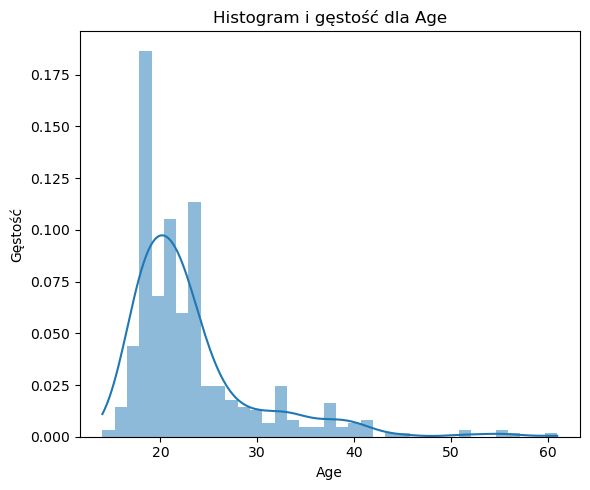

In [7]:
#| echo: false
#| output: true
fig, ax = plt.subplots(figsize=(6, 5))
create_hist_density(df, 'Age', ax)
plt.tight_layout()
plt.show()

## Weight

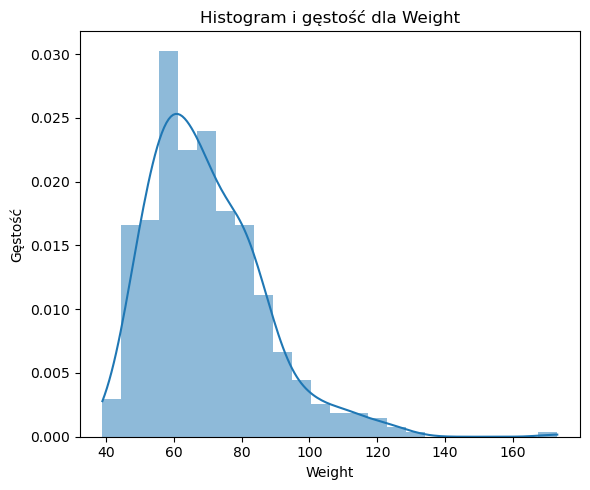

In [8]:
#| echo: false
#| output: true
fig, ax = plt.subplots(figsize=(6, 5))
create_hist_density(df, 'Weight', ax)
plt.tight_layout()
plt.show()

## Height

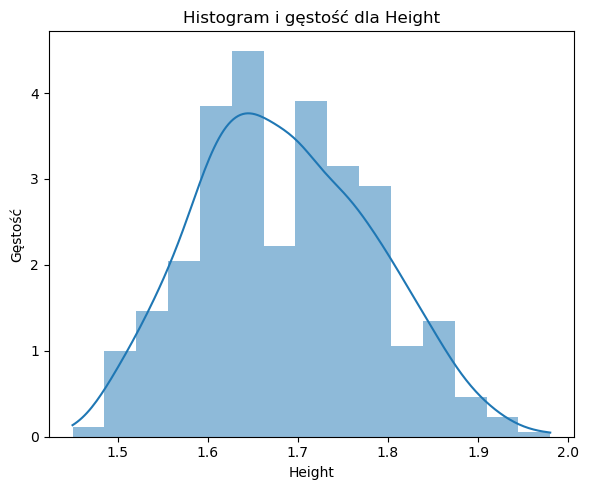

In [9]:
#| echo: false
#| output: true
fig, ax = plt.subplots(figsize=(6, 5))
create_hist_density(df, 'Height', ax)
plt.tight_layout()
plt.show()

## BMI

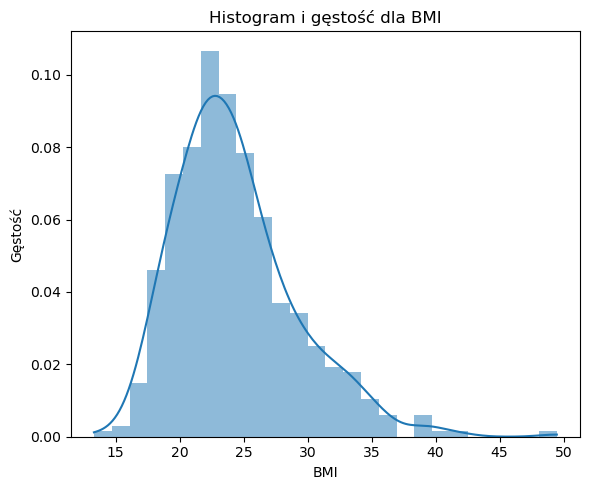

In [10]:
#| echo: false
#| output: true
fig, ax = plt.subplots(figsize=(6, 5))
create_hist_density(df, 'BMI', ax)
plt.tight_layout()
plt.show()

:::

### Boxplot

Wykres pudełkowy dla zmiennej Age. Widzimy, że starzenie się społeczeństwa wpływa na postępującą otyłość:

Text(0.5, 1.0, 'Boxplot zmiennej Age w podziale na kategorie wagowe')

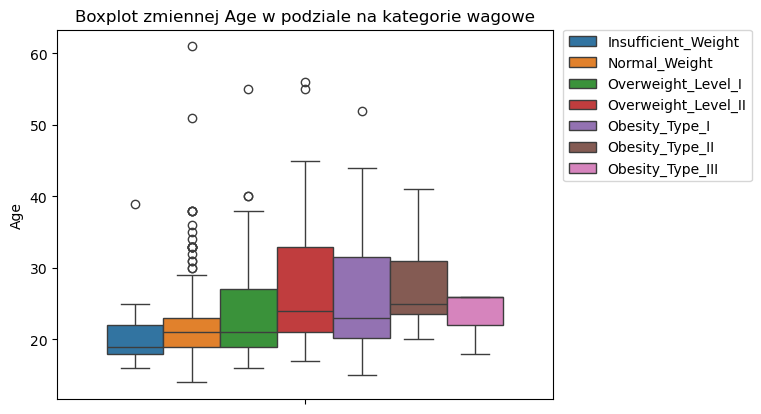

In [11]:
#| echo: true
#| output: true
plot = sns.boxplot(data=df, y='Age', hue='BMI_classification', hue_order=custom_order)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plot.set_title("Boxplot zmiennej Age w podziale na kategorie wagowe")

### Plot - czynniki żywieniowe

::: {.panel-tabset}
## Alcohol Consumption

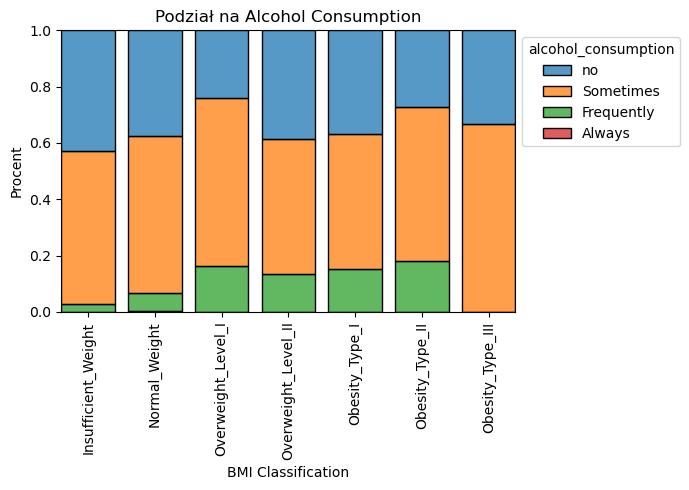

In [12]:

#| echo: true
#| output: true
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=df, x='BMI_classification', hue='alcohol_consumption', multiple="fill",
             discrete=True, shrink=0.8, stat="percent")
ax.set_title('Podział na Alcohol Consumption')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('BMI Classification')  
plt.ylabel('Procent')            
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Vegetables consumption


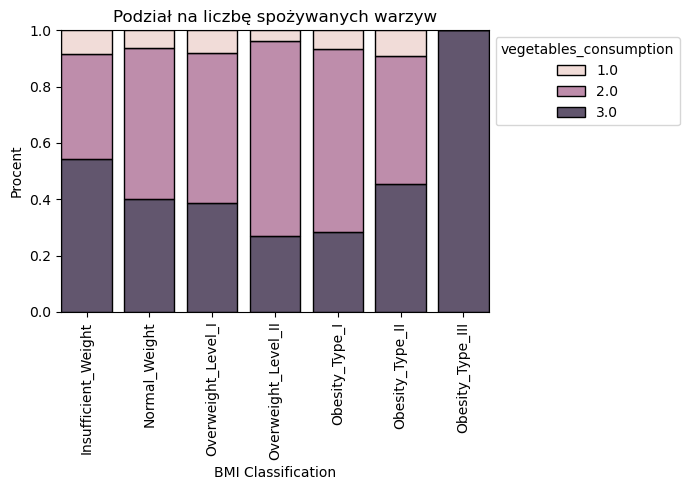

In [13]:
#| echo: true
#| output: true

fig, ax = plt.subplots(figsize=(7,5))
# Warzywa
sns.histplot(data=df, x='BMI_classification', hue='vegetables_consumption', multiple="fill",
             discrete=True, shrink=0.8, stat="percent")
ax.set_title('Podział na liczbę spożywanych warzyw') 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('BMI Classification')  
plt.ylabel('Procent')            
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## No. of main meals


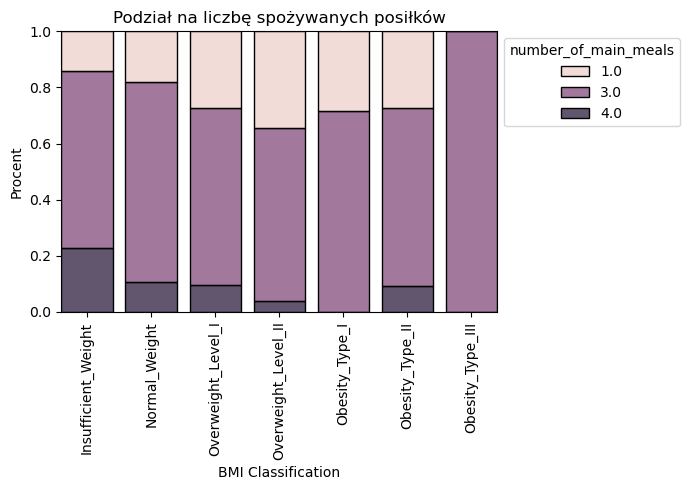

In [14]:
#| echo: true
#| output: true

fig, ax = plt.subplots(figsize=(7,5))

# Główne posiłki
sns.histplot(data=df, x='BMI_classification', hue='number_of_main_meals', multiple="fill",
             discrete=True, shrink=0.8, stat="percent")
ax.set_title('Podział na liczbę spożywanych posiłków')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('BMI Classification')  
plt.ylabel('Procent')            
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Consumption between meals


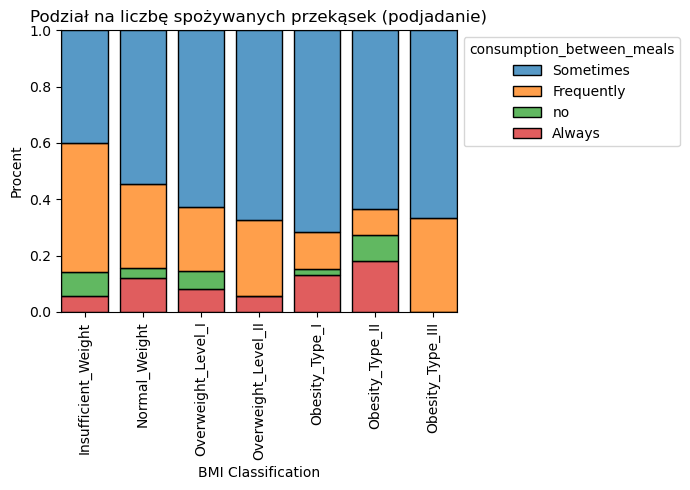

In [15]:
#| echo: true
#| output: true

fig, ax = plt.subplots(figsize=(7,5))

# Częstość podjadania
ax = sns.histplot(data=df, x='BMI_classification', hue='consumption_between_meals', multiple="fill",
             discrete=True, shrink=0.8, stat="percent", ax = ax)
ax.set_title('Podział na liczbę spożywanych przekąsek (podjadanie)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('BMI Classification')  
plt.ylabel('Procent')            
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

:::

In [30]:
#| echo: false
#| output: false
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [33]:
#| echo: false
#| output: true
color_dropdown = widgets.Dropdown(
    options=['prefered_transportation', 'time_using_technology', 'physical_activity', 'calories_monitoring', 'high_caloric_food'],
    value='prefered_transportation',
    description='Kolor wg:',
    style={'description_width': 'initial'}
)

def update_plot(color_by):
    fig = px.scatter(df, x='Age', y='BMI', color=df[color_by],
                     title=f'Wykres BMI vs Age (kolor: {color_by})',
                     labels={'Age': 'Wiek', 'BMI': 'Indeks BMI'},
                     color_continuous_scale='viridis')
    fig.show()


widgets.interactive(update_plot, color_by=color_dropdown)

interactive(children=(Dropdown(description='Kolor wg:', options=('prefered_transportation', 'time_using_techno…

# Model uczenia maszynowego

### Model XGBoost

Wykorzystano wzmacniane gradientowo drzewa decyzyjne z użyciem biblioteki XGBoost do rozwiązania zagadnienia klasyfikacyjnego stopnii otyłości. Zmienną objaśnianą były kategorie BMI, zmiennymi objaśniającymi pozostałe atrybuty tabeli z pominięciem wzrostu, masy i wskaźnika BMI. Wzrost i masa zostały pominięte jako, że są bezpośrednio skorelowane ze wskaźnikiem i kategorią BMI ze względu na wzór je wyznaczający, zaś sama kategoria wynika ze wskaźnika. Użycie tych trzech atrybutów zapewne pozwoliło uzyskać bardzo wysoką dokładność modelu, jakkolwiek nie miałby żadnego sensu w aspekcie wnioskowania statystycznego.

W pierwszym kroku zainicjowano niezbędne biblioteki, zaczytano dane z odrzuceniem kolumn, które nie brału udziały w uczeniu maszynowym. Zmienna objaśniania została przypisana słownikowo do cyfr z zakresu <0:6>. Pozostałe kolumny kategoryczne zostały zetykietowane z użyciem metody LabelEncoder z biblioteki sklearn. Model trenowany był z wykorzystaniem walidacji krzyżowej z podziałem na 10 podzbiorów - 9 treningowych i 1 testowy w każdej turze.


In [4]:
#| echo: true
#| output: true
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

data = pd.read_csv("obesity_clear.csv", usecols=lambda x: x not in ['Height', 'Weight', 'BMI'], index_col=0)
bmi_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
reverse_bmi_mapping = {v: k for k, v in bmi_mapping.items()}
data['BMI_classification'] = data['BMI_classification'].map(bmi_mapping)

label_encoder = LabelEncoder()
categorical_columns = [
    'Gender',
    'overweight_in_family',
    'high_cal_food',
    'consumption_between_meals',
    'is_smoking',
    'calories_monitoring',
    'alcohol_consumption',
    'prefered_transportation'
]
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(columns=['BMI_classification'])
y = data['BMI_classification']

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    random_state=42,
)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(xgb_model, X, y, cv=skf)

print("\nDetailed Classification Report (10-fold CV):")
print(classification_report(y, y_pred,
                          target_names=[reverse_bmi_mapping[i] for i in range(len(bmi_mapping))]))

fold_metrics = []
train_accuracies = []
test_accuracies = []

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Fit model and make predictions
    xgb_model.fit(X_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = xgb_model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
    
    # Calculate validation accuracy and other metrics
    y_val_pred = xgb_model.predict(X_val)
    test_acc = accuracy_score(y_val, y_val_pred)
    test_accuracies.append(test_acc)
    
    fold_report = classification_report(y_val, y_val_pred,
                                      target_names=[reverse_bmi_mapping[i] for i in range(len(bmi_mapping))],
                                      output_dict=True)
    fold_metrics.append(fold_report)

print("\nPer-category metrics across folds (mean ± std):")
categories = [reverse_bmi_mapping[i] for i in range(len(bmi_mapping))]
for category in categories:
    precision_scores = [fold[category]['precision'] for fold in fold_metrics]
    recall_scores = [fold[category]['recall'] for fold in fold_metrics]
    f1_scores = [fold[category]['f1-score'] for fold in fold_metrics]
    support = fold_metrics[0][category]['support']
    print(f"\n{category}:")
    print(f"Precision: {np.mean(precision_scores):.4f} (±{np.std(precision_scores):.4f})")
    print(f"Recall: {np.mean(recall_scores):.4f} (±{np.std(recall_scores):.4f})")
    print(f"F1-score: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")
    print(f"Support: {support}")

print(f"\nTraining Accuracy: {np.mean(train_accuracies):.4f} (±{np.std(train_accuracies):.4f})")
print(f"Test Accuracy: {np.mean(test_accuracies):.4f} (±{np.std(test_accuracies):.4f})")


Detailed Classification Report (10-fold CV):
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.85      0.84       271
      Normal_Weight       0.64      0.60      0.62       300
 Overweight_Level_I       0.68      0.68      0.68       285
Overweight_Level_II       0.71      0.64      0.67       281
     Obesity_Type_I       0.78      0.78      0.78       368
    Obesity_Type_II       0.76      0.87      0.81       338
   Obesity_Type_III       0.93      0.88      0.90       268

           accuracy                           0.76      2111
          macro avg       0.76      0.76      0.76      2111
       weighted avg       0.76      0.76      0.76      2111


Per-category metrics across folds (mean ± std):

Insufficient_Weight:
Precision: 0.8253 (±0.0559)
Recall: 0.8485 (±0.0674)
F1-score: 0.8358 (±0.0562)
Support: 27.0

Normal_Weight:
Precision: 0.6433 (±0.1060)
Recall: 0.5967 (±0.1059)
F1-score: 0.6162 (±0.0997)
Support: 30.0

Over

Widoczne jest przeuczenie modelu - uśrednione wyniki na zbiorach treningowych są o ~20% lepsze niż na zbiorach testowych. Najgorsze wyniki model osiąga w klasyfikowaniu wagi normalnej oraz lekkiej nadwagi. Najlepsze wyniki osiąga w kategoryzowaniu najwyższego stopnia otyłości. Aby dokładniej przeanalizować wyniki modelu, wygenerowany został confusion matrix.

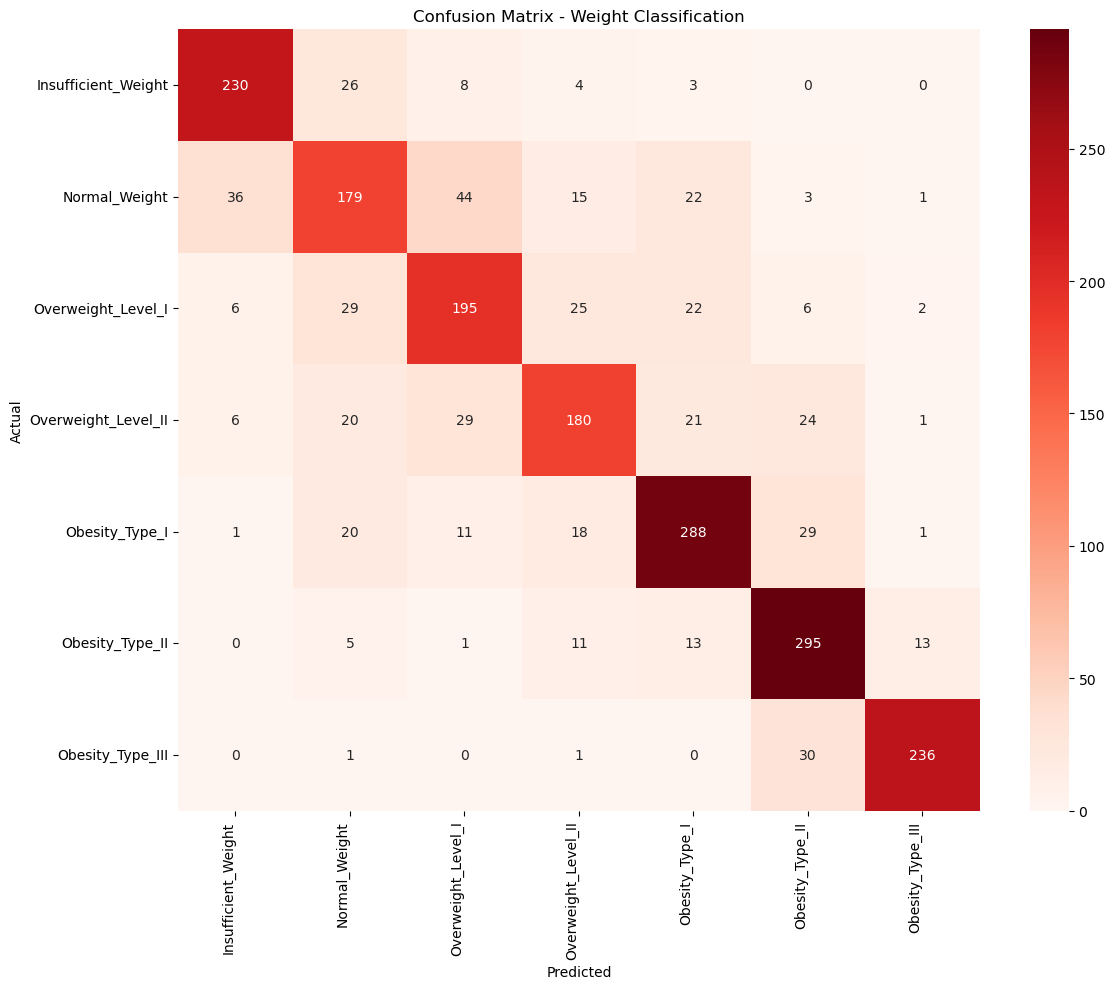

In [5]:
#| echo: true
#| output: true
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(12, 10))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            xticklabels=[reverse_bmi_mapping[i] for i in range(len(bmi_mapping))],
            yticklabels=[reverse_bmi_mapping[i] for i in range(len(bmi_mapping))])

plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Weight Classification')

plt.tight_layout()

plt.show()

Confusion matrix wskazuje, że model ma problem z precyzyjnym wskazaniem konkretnej kategorii BMI. Najczętszym błędem jest niepoprawne wskazanie najbliższego sąsiada. Wywnioskować z tego można, że cechy w analizowanym zestawie danych są niewystarczające do tak dokładnej klasyfikacji. Szczególnie widoczne jest to w przypadku wagi prawidłowej i lekkiej nadwagi gdzie wyniki wskazują na to, że istnieje więcej subtelnych zależności mogących prowadzić do zakwalifowania do którejś z tych klasyfikcji. Ponadto zgodnie z analizą literaturą sam wskaźnik BMI jest wysoce obciążony niedokładnością ze względu na jego "prostotę". Bierze on pod uwagę wyłącznie wzrost i masę ciała. Jest on w związku z tym nieprzydatny w przypadku ludzi czynnie uczęszczających na siłownię i budujących masę mięśniową - gdzie nieprawidłowo w ich przypadku jest wskazywana nadwaga albo otyłość. Dla poprawy modelu sugerowane jest więc dodanie dodatkowych cech do modelu umożliwiających poprawną identyfikację bardziej subtelnych wzorców.

Końcowo wygenerowano jeszcze wykres słupkowy współczynników cech modelu by zidentyfikować te zmienne objaśniające, którą miały największą wagę przy predykcji


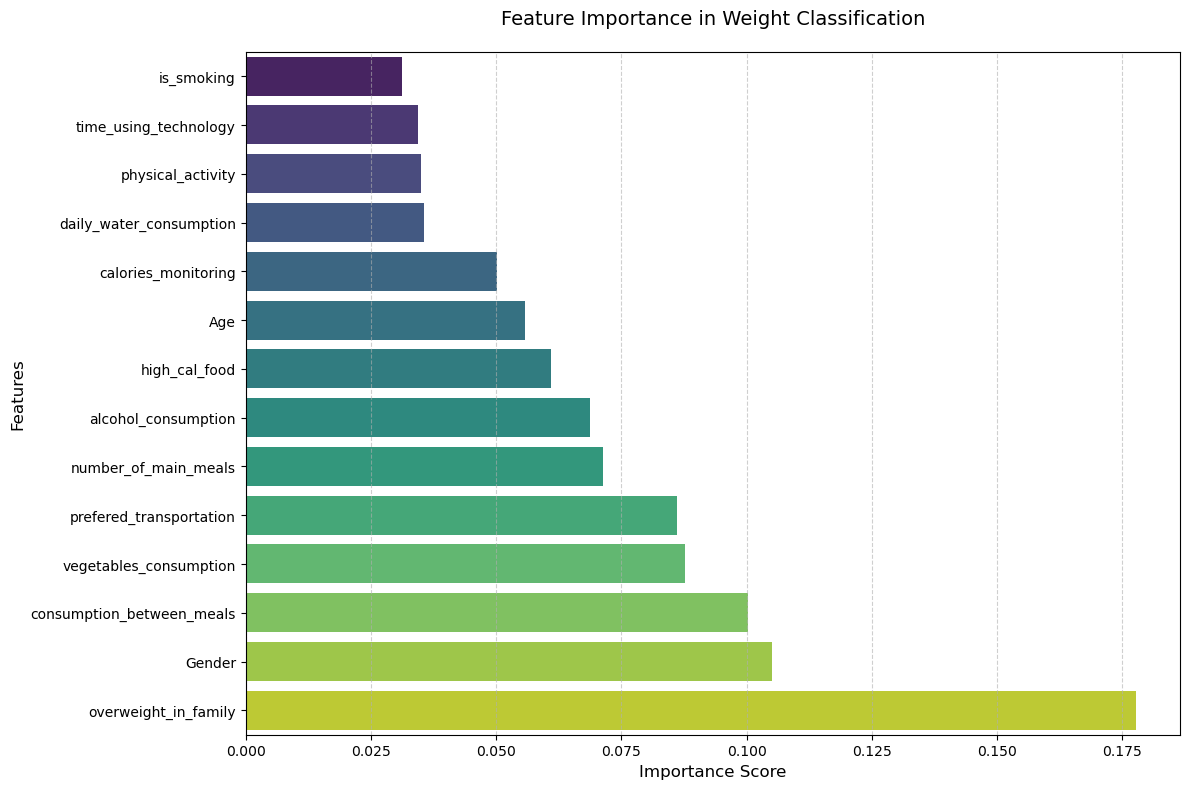


Feature Importance Scores:
is_smoking: 0.0313
time_using_technology: 0.0343
physical_activity: 0.0350
daily_water_consumption: 0.0357
calories_monitoring: 0.0502
Age: 0.0558
high_cal_food: 0.0609
alcohol_consumption: 0.0687
number_of_main_meals: 0.0713
prefered_transportation: 0.0862
vegetables_consumption: 0.0876
consumption_between_meals: 0.1002
Gender: 0.1051
overweight_in_family: 0.1776


In [6]:
#| echo: true
#| output: true
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})

feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance,
    y='Feature',
    x='Importance',
    hue = 'Feature',
    palette='viridis'
)

plt.title('Feature Importance in Weight Classification', pad=20, size=14)
plt.xlabel('Importance Score', size=12)
plt.ylabel('Features', size=12)

plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

print("\nFeature Importance Scores:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")